<a href="https://colab.research.google.com/github/Caneralp242/t-p/blob/main/Brain_Tumor_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import random
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import os
os.chdir("/gdrive/My Drive")
!ls

 20170105_173517.jpg
'2019 Takvimi.gsheet'
 autoencodemiroglu.ipynb
 autoencoder.ipynb
'Brain Tumor Segmentation.ipynb'
 calışma_ortamı
'Copy of Linear Algebra 1.2.pdf'
 darknet.zip
'EFT ile Para Girisi Bildirimi.html'
 emiroğlu
 GANs.ipynb
'Hesaba Para giris bildirimi.html'
'Kopyası - Explore example .gsheet'
 mushrooms.csv
'New Zip.zip'
 no
'Note 5 Oct 2020.pdf'
 notebook83259cc8d8.ipynb
 OpenCV
 opencv.ipynb
'OSMANLI DEVLET ANLAYIŞI (1).pptx.gslides'
'OSMANLI DEVLET ANLAYIŞI.pptx'
'OSMANLI DEVLET ANLAYIŞI.pptx.gslides'
 SPARK-ed.pdf
 spot_model.ipynb
 spot_weights
 tıp
 yekkaleli
 yes


In [ ]:
no="/gdrive/My Drive/no"
yes="/gdrive/My Drive/yes"
yes=os.listdir(yes)
no=os.listdir(no)

In [ ]:
yest=[]
for i in range(len(yes)):
  yest.append("/gdrive/My Drive/yes/"+ yes[i])
  

nott=[]
for i in range(len(no)):
  nott.append("/gdrive/My Drive/no/"+ no[i])
  

In [ ]:
nott

['/gdrive/My Drive/no/1 no.jpeg',
 '/gdrive/My Drive/no/11 no.jpg',
 '/gdrive/My Drive/no/10 no.jpg',
 '/gdrive/My Drive/no/18 no.jpg',
 '/gdrive/My Drive/no/N16.jpg',
 '/gdrive/My Drive/no/47 no.jpg',
 '/gdrive/My Drive/no/N19.JPG',
 '/gdrive/My Drive/no/43 no.jpg',
 '/gdrive/My Drive/no/2 no.jpeg',
 '/gdrive/My Drive/no/N17.jpg',
 '/gdrive/My Drive/no/26 no.jpg',
 '/gdrive/My Drive/no/9 no.jpg',
 '/gdrive/My Drive/no/13 no.jpg',
 '/gdrive/My Drive/no/41 no.jpg',
 '/gdrive/My Drive/no/38 no.jpg',
 '/gdrive/My Drive/no/14 no.jpg',
 '/gdrive/My Drive/no/48 no.jpeg',
 '/gdrive/My Drive/no/5 no.jpg',
 '/gdrive/My Drive/no/40 no.jpg',
 '/gdrive/My Drive/no/45 no.jpg',
 '/gdrive/My Drive/no/24 no.jpg',
 '/gdrive/My Drive/no/46 no.jpg',
 '/gdrive/My Drive/no/44no.jpg',
 '/gdrive/My Drive/no/49 no.jpg',
 '/gdrive/My Drive/no/33 no.jpg',
 '/gdrive/My Drive/no/28 no.jpg',
 '/gdrive/My Drive/no/34 no.jpg',
 '/gdrive/My Drive/no/N2.JPG',
 '/gdrive/My Drive/no/50 no.jpg',
 '/gdrive/My Drive/no/42 

In [ ]:
x_traint=yest[:130]+nott[:75]
x_testt=yest[130:]+nott[75:]



In [ ]:
y_train=[]
for i in (x_traint):
  if i.startswith("/gdrive/My Drive/yes"):
    y_train.append(1)
  else:
    y_train.append(0)


y_test=[]
for i in x_testt:
  if i.startswith("/gdrive/My Drive/yes"):
    y_test.append(1)
  else:
    y_test.append(0)
  



In [ ]:
train_list=[]
for i in (x_traint):

  imgO=cv2.imread(i)
  imgO=cv2.resize(imgO,(200,200))
  lab=cv2.cvtColor(imgO,cv2.COLOR_BGR2Lab)
  l,a,b=cv2.split(lab)
  clahe=cv2.createCLAHE(clipLimit=5.0,tileGridSize=((8,8)))
  cl=clahe.apply(l)
  limg=cv2.merge((cl,a,b))
  son=cv2.cvtColor(limg,cv2.COLOR_LAB2BGR)
  med_son=cv2.medianBlur(son,3)
  arka_plan=cv2.medianBlur(son,37)
  maske=cv2.addWeighted(med_son,1,arka_plan,-1,255)
  son_img=cv2.bitwise_and(maske,med_son)
  train_list.append(son_img)

In [ ]:
len(train_list)

205

In [ ]:
test_list=[]
for i in (x_testt):

  imgO=cv2.imread(i)
  imgO=cv2.resize(imgO,(200,200))
  lab=cv2.cvtColor(imgO,cv2.COLOR_BGR2Lab)
  l,a,b=cv2.split(lab)
  clahe=cv2.createCLAHE(clipLimit=5.0,tileGridSize=((8,8)))
  cl=clahe.apply(l)
  limg=cv2.merge((cl,a,b))
  son=cv2.cvtColor(limg,cv2.COLOR_LAB2BGR)
  med_son=cv2.medianBlur(son,3)
  arka_plan=cv2.medianBlur(son,37)
  maske=cv2.addWeighted(med_son,1,arka_plan,-1,255)
  son_img=cv2.bitwise_and(maske,med_son)
  test_list.append(son_img)

In [ ]:
plt.imshow(lab)

In [ ]:
plt.imshow(son,cmap="gray")

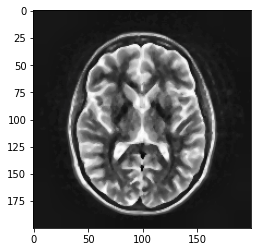

In [14]:
plt.imshow(med_son,cmap="gray")

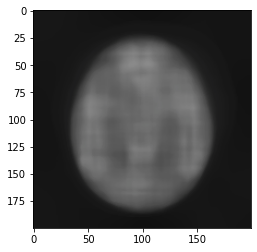

In [15]:
plt.imshow(arka_plan,cmap="gray")

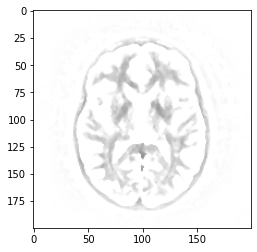

In [16]:
plt.imshow(maske,cmap="gray")

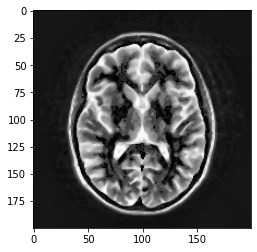

In [17]:
plt.imshow(son_img,cmap="gray")

In [18]:
len(train_list)

205

In [19]:
import numpy as np
x_train_last=np.array(train_list)
x_test_last=np.array(test_list)
y_train_last=np.array(y_train)
y_test_last=np.array(y_test)

In [20]:
len(x_train_last),type(x_train_last),len(y_train_last),type(y_train_last)

(205, numpy.ndarray, 205, numpy.ndarray)

In [21]:
from keras.callbacks import ReduceLROnPlateau
lr=ReduceLROnPlateau(monitor="val_accuracy",
                     pateince=3,
                     verbose=1,mode="auto",
                     factor=0.25,
                     min_lr=0.000001)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
from keras.optimizers import Adam
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=x_train_last.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train_last,y_train_last,epochs=100,validation_data=(x_test_last,y_test_last),callbacks=[lr])

Epoch 1/100
7/7 [==============================] - 8s 956ms/step - loss: 359.4267 - accuracy: 0.4854 - val_loss: 47.8963 - val_accuracy: 0.5208
Epoch 2/100
7/7 [==============================] - 6s 861ms/step - loss: 51.0009 - accuracy: 0.7121 - val_loss: 5.2175 - val_accuracy: 0.8333
Epoch 3/100
7/7 [==============================] - 6s 867ms/step - loss: 15.6948 - accuracy: 0.7155 - val_loss: 4.3719 - val_accuracy: 0.8542
Epoch 4/100
7/7 [==============================] - 6s 859ms/step - loss: 7.0320 - accuracy: 0.7883 - val_loss: 2.9079 - val_accuracy: 0.8542
Epoch 5/100
7/7 [==============================] - 6s 857ms/step - loss: 3.2442 - accuracy: 0.8686 - val_loss: 2.3135 - val_accuracy: 0.8958
Epoch 6/100
7/7 [==============================] - 6s 860ms/step - loss: 2.3942 - accuracy: 0.8929 - val_loss: 1.3531 - val_accuracy: 0.8750
Epoch 7/100
7/7 [==============================] - 6s 869ms/step - loss: 1.1166 - accuracy: 0.9332 - val_loss: 1.0832 - val_accuracy: 0.8750
Epoch 8/